# Measuring activation fronts near death
Tim Tyree<br>
5.7.2021

In [1]:
from lib.my_initialization import *
from lib.controller.controller_LR import get_one_step_explicit_synchronous_splitting
from lib.utils import load_buffer
from lib.routines.return_min_distance import *
from lib.viewer.DomainPlot import ShowDomain

#automate the boring stuff
# from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
    
%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


In [2]:
darkmode=True
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [3]:
dt=0.001
txt_fn=f'{nb_dir}/Data/test_data/ic008.33_t_218.8.npz'
t=218.8;ds=5.;V_threshold=-50.
txt=load_buffer(txt_fn)
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
width,height=txt.shape[:2]
print(txt.shape)
one_step,comp_distance,comp_dict_tips=init_methods(width,height,ds,dt,V_threshold=V_threshold,jump_threshold=40)
comp_dict_topo_full_color=comp_dict_tips
#reidentify the tips to be tracked
img=inVc[...,0];dimgdt=dVcdt[...,0]
dict_tips=comp_dict_tips(img, dimgdt, t, txt)
pdict=ParticlePBCDict(dict_tips=dict_tips, width=width, height=width)#, **kwargs)
t_prev=t;txt_prev=txt.copy()

(200, 200, 18)


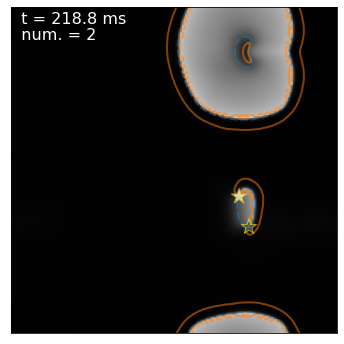

In [4]:
#visualize token death system
x_values=np.array(dict_tips['x'])[:-2]
y_values=np.array(dict_tips['y'])[:-2]
c_values=np.array(dict_tips['pid'])[:-2]
fig = ShowDomain(img,dimgdt,x_values,y_values,c_values,V_threshold,t,inch=6,
                 fontsize=16,vmin_img=-85.,vmax_img=35.,area=25,
                 frameno=None,#frameno,
                 save_fn=None,#save_fn,
                 save_folder=None,#save_folder,
                 save=False,#True,
                 annotating=True,
                 axis=[0,img.shape[0],0,img.shape[1]])

In [5]:
#better method: take more data! (after condensing data to a simple readout)
#DONE/DONT(later): look for more reliable way to identify activation fronts... use consistency of position over time??
# HINT: consider looking at mean gating variables from the comp_dict_topo_full_color
#TODO: linearly record data for ^these spiral tips at a high sampling rate (and fine spatial resolution)

In [6]:
#TODO(brainwarmer): check Slides for whether tips move along dVdt levelsets or along V levelsets
#TODO: load/plot system
#TODO: compute each of the the final scalar values needed for the following...
#TODO: test angular difference between cartesion acceleration and acceleration in the direction of the activation front versus time
#TODO: linearly track lesser_arclen of these two death events on a dt=0.001 ms timescale fixed at the basic subpixel resolution
#TODO: test proposition that lesser_arclen always drops shortly annihilating, perhaps on the 0.01~0.02 (ms?) timescale.  
# ^This would support the mechanism of annihilation involving the connection of activation fronts/strings with some tension to contract
# ^This would support using a model of spiral tip dynamics along an activation front to inform our reaction rate calculations
# HINT: consider rate = 1/expected_time_to_death, where the arclength behaves in a predictable way, i.e.
# dsigma_max_dt=foo(sigma_max;relative phase?)

In [7]:
# from inspect import getsource
# print ( getsource(pdict.record_tips_return_txt))
# pdict.record_tips_return_txt?
ntips=len(dict_tips['x'])
assert(ntips>0)

In [8]:
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
frameno=0
save_every_n_frames=1
# while change_time<=duration:
while ntips>0:
    frameno+=1
    t+=dt
    one_step(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)
    if frameno % save_every_n_frames == 0:
        dict_tips=comp_dict_tips(img, dimgdt, t, txt)
        pdict.merge_dict(dict_tips)
        ntips=len(dict_tips['x'])
        print(f"saved at time {t:.3f} ms.",end='\r')

txt=stack_txt(inVc,outVc,inmhjdfx,outmhjdfx,dVcdt)

In [9]:
#format/save output pdict
modname=f"{nb_dir}/Data/test_data/steady_death_test_t_{t:.3f}_DT_0.001"
pdict.to_csv_and_json(modname)

{0: (size,t,x,y)=(38522,257.321,144.490,76.002);,
 1: (size,t,x,y)=(1064,219.863,145.999,65.188);,
 2: (size,t,x,y)=(1,218.800,146.708,169.141);,
 3: (size,t,x,y)=(1,218.800,146.806,168.953);,
 4: (size,t,x,y)=(69,219.863,146.017,65.187);,
 5: (size,t,x,y)=(1475,221.269,146.999,65.149);,
 6: (size,t,x,y)=(156,221.269,147.009,65.148);,
 7: (size,t,x,y)=(1617,222.730,147.999,65.093);,
 8: (size,t,x,y)=(319,222.730,148.006,65.093);,
 9: (size,t,x,y)=(1117,223.528,139.922,84.001);,
 10: (size,t,x,y)=(290,223.528,139.924,83.999);,
 11: (size,t,x,y)=(2794,226.032,138.315,85.000);,
 12: (size,t,x,y)=(235,223.974,150.000,65.110);,
 13: (size,t,x,y)=(235,223.974,149.999,65.110);,
 14: (size,t,x,y)=(137,226.032,138.320,84.999);,
 15: (size,t,x,y)=(7512,233.407,146.000,66.568);,
 16: (size,t,x,y)=(375,233.407,146.007,66.575);,
 17: (size,t,x,y)=(23466,256.498,144.534,69.996);,
 18: (size,t,x,y)=(38,256.498,144.553,70.053);,
 19: (size,t,x,y)=(861,257.321,144.492,75.996);,
 20: (size,t,x,y)=(112,2

# plots of the arms of the last living tip

In [30]:
#import df from ^that modname
pid_alive_lst=pdict.get_alive_particles()
pid=pid_alive_lst[0]
#OR separate pdict directly without saving
df, dict_greater_dict, dict_lesser_dict=pdict.separate_data_to_pandas()

In [83]:
from jupyterthemes import jtplot
jtplot.style(context='notebook', ticks=True, grid=False)

In [305]:
def compute_field_values(pdict,field):
    pid_lst=pdict.get_alive_particles()
    last_particle=pdict[pid_lst[0]]
    values=np.array(last_particle[field])
    return values

def compute_sigma_max_values(pdict,ds=5.,field='lesser_arclen',pid=None):
    if pid is None:
        pid_lst=pdict.get_alive_particles()
        last_particle=pdict[pid_lst[0]]
    else:
        last_particle=pdict[pid]
    scale=ds/last_particle.width #cm/pixel
    sigma_max_values=scale*np.array(last_particle[field])
    return sigma_max_values

def compute_t_values(pdict,ds=5.,field='t'):
    pid_lst=pdict.get_alive_particles()
    last_particle=pdict[pid_lst[0]]
    scale=1.#ms per ms
    t_values=scale*np.array(last_particle[field])
    return t_values

In [361]:
t_values=compute_t_values(pdict,ds=5.,field='t')
greater_mean_V_values=compute_field_values(pdict,field='greater_mean_V')
lesser_mean_V_values=compute_field_values(pdict,field='lesser_mean_V')
greater_mean_curvature_values=compute_field_values(pdict,field='greater_mean_curvature')
lesser_mean_curvature_values=compute_field_values(pdict,field='lesser_mean_curvature')
pdict[0].keys()


dict_keys(['x', 'y', 't', 'lesser_pid', 'lesser_arclen', 'greater_pid', 'greater_arclen', 's1', 's2', 'pid', 'greater_arclen_values', 'lesser_arclen_values', 'greater_mean_V', 'lesser_mean_V', 'greater_mean_curvature', 'lesser_mean_curvature', 'greater_xy_values', 'lesser_xy_values', 'greater_V_values', 'lesser_V_values', 'greater_curvature_values', 'lesser_curvature_values'])

In [362]:
#TODO: compute sigma_max as a function of time 
#HINT: open compute_last_sigma_max
#TODO: make compute_last_sigma_max use the pid_pair of interest explicitely
sigma_max_lesser_values=compute_sigma_max_values(pdict,ds)
sigma_max_greater_values=compute_sigma_max_values(pdict,ds,field='greater_arclen')
# from inspect import getsource
# print ( getsource(compute_last_sigma_max))
x_values=t_values[-1]-t_values

In [ ]:

# #TODO: visualize sigma_max versus time until annihilation
# #TODO: visualize naive distance versus time until death
# plt.plot(x_values,sigma_max_lesser_values,label='lesser arclength',c='C0')
# plt.plot(x_values,sigma_max_greater_values,label='greater arclength',c='C4')
# plt.yscale('log')
# plt.ylabel('')
# pdict

	time between two frames was 0.001 ms


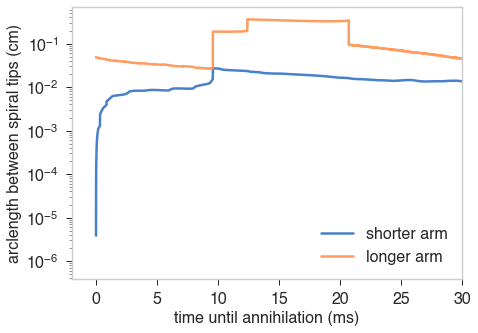

In [363]:
fontsize=16
#plot naive range at death and birth
plt.subplots(figsize=(7,5))
plt.plot(x_values,sigma_max_lesser_values,label='shorter arm',c='C0',lw=2.5,alpha=0.9)
plt.plot(x_values,sigma_max_greater_values,label='longer arm',c='C4',lw=2.5,alpha=0.9)
plt.xlabel('time until annihilation (ms)',fontsize=fontsize)
plt.ylabel('arclength between spiral tips (cm)',fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.xlim([-2,30])
# plt.xlim([1e-3,30])
# plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=1)
print(f"\ttime between two frames was {0.001} ms")

saving=False
savefig_folder=f"{nb_dir}/Figures/fine_death"
savefig_fn=f"fine-death-arclen.png"
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

	time between two frames was 0.001 ms
saved figure in 
	fine-death-arclen-log.png


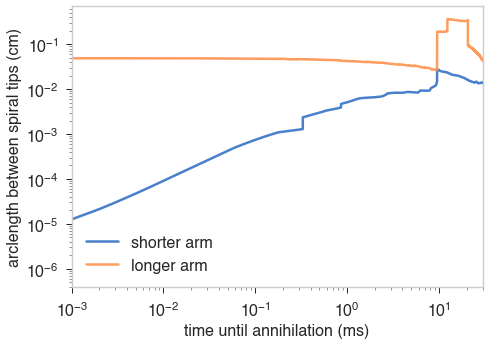

In [365]:
fontsize=16
#plot naive range at death and birth
plt.subplots(figsize=(7,5))
plt.plot(x_values,sigma_max_lesser_values,label='shorter arm',c='C0',lw=2.5,alpha=0.9)
plt.plot(x_values,sigma_max_greater_values,label='longer arm',c='C4',lw=2.5,alpha=0.9)
plt.xlabel('time until annihilation (ms)',fontsize=fontsize)
plt.ylabel('arclength between spiral tips (cm)',fontsize=fontsize)
plt.legend(fontsize=fontsize)
# plt.xlim([-2,30])
plt.xlim([1e-3,30])
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=1)
print(f"\ttime between two frames was {0.001} ms")

saving=True
savefig_folder=f"{nb_dir}/Figures/fine_death"
savefig_fn=f"fine-death-arclen-log.png"
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [364]:
fontsize=16
#plot naive range at death and birth
plt.subplots(figsize=(7,5))#(5,4))
plt.plot(x_values[1:],lesser_mean_curvature_values,label='shorter arm',c='C0',lw=2.5,alpha=0.9)
plt.plot(x_values[1:],greater_mean_curvature_values,label='longer arm',c='C4',lw=2.5,alpha=0.9)
plt.xlabel('time until annihilation (ms)',fontsize=fontsize)
plt.ylabel('mean curvature (1/cm)',fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.ylim([1e0,1e9])
plt.xlim([-2,30])
# plt.xlim([1e-3,30])
# plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=1)
# print(f"\ttime between two frames was {0.001} ms")

saving=True
savefig_folder=f"{nb_dir}/Figures/fine_death"
savefig_fn=f"fine-death-curvature.png"
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
    plt.close()

saved figure in 
	fine-death-curvature.png


saved figure in 
	fine-death-curvature-log.png


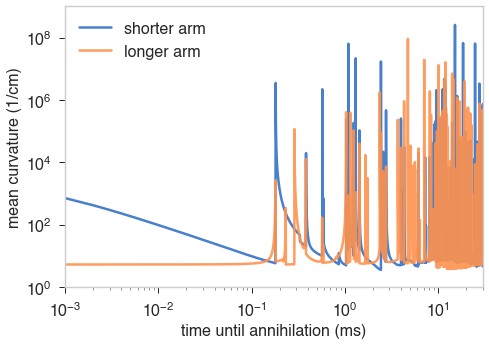

In [353]:
fontsize=16
#plot naive range at death and birth
plt.subplots(figsize=(7,5))#(5,4))
plt.plot(x_values[1:],lesser_mean_curvature_values,label='shorter arm',c='C0',lw=2.5,alpha=0.9)
plt.plot(x_values[1:],greater_mean_curvature_values,label='longer arm',c='C4',lw=2.5,alpha=0.9)
plt.xlabel('time until annihilation (ms)',fontsize=fontsize)
plt.ylabel('mean curvature (1/cm)',fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.ylim([1e0,1e9])
# plt.xlim([-2,30])
plt.xlim([1e-3,30])
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=1)
# print(f"\ttime between two frames was {0.001} ms")

saving=True
savefig_folder=f"{nb_dir}/Figures/fine_death"
savefig_fn=f"fine-death-curvature-log.png"
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

saved figure in 
	fine-death-voltage.png


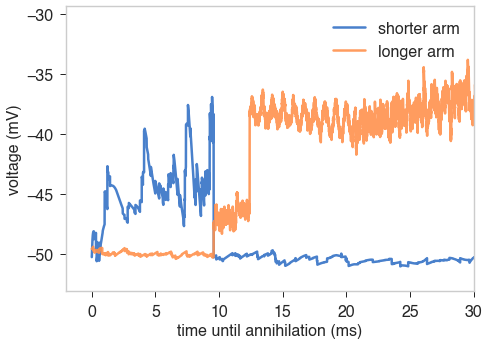

In [354]:
fontsize=16
#plot naive range at death and birth
plt.subplots(figsize=(7,5))#(5,4))
plt.plot(x_values[1:],lesser_mean_V_values,label='shorter arm',c='C0',lw=2.5,alpha=0.9)
plt.plot(x_values[1:],greater_mean_V_values,label='longer arm',c='C4',lw=2.5,alpha=0.9)
plt.xlabel('time until annihilation (ms)',fontsize=fontsize)
plt.ylabel('voltage (mV)',fontsize=fontsize)
plt.legend(fontsize=fontsize)
# plt.ylim([1e0,1e9])
plt.xlim([-2,30])
# plt.xlim([1e-3,30])
# plt.xscale('log')
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=1)
# print(f"\ttime between two frames was {0.001} ms")

saving=True
savefig_folder=f"{nb_dir}/Figures/fine_death"
savefig_fn=f"fine-death-voltage.png"
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

saved figure in 
	fine-death-voltage-log.png


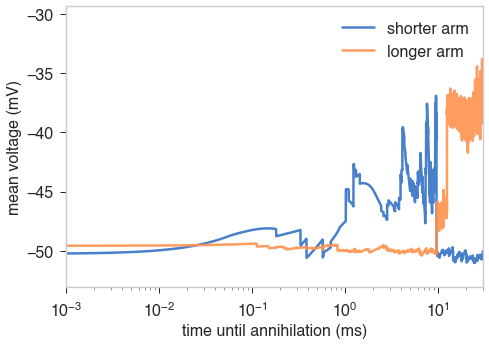

In [356]:
fontsize=16
#plot naive range at death and birth
plt.subplots(figsize=(7,5))#(5,4))
plt.plot(x_values[1:],lesser_mean_V_values,label='shorter arm',c='C0',lw=2.5,alpha=0.9)
plt.plot(x_values[1:],greater_mean_V_values,label='longer arm',c='C4',lw=2.5,alpha=0.9)
plt.xlabel('time until annihilation (ms)',fontsize=fontsize)
plt.ylabel('mean voltage (mV)',fontsize=fontsize)
plt.legend(fontsize=fontsize)
# plt.ylim([1e0,1e9])
# plt.xlim([-2,30])
plt.xlim([1e-3,30])
plt.xscale('log')
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=1)
# print(f"\ttime between two frames was {0.001} ms")

saving=True
savefig_folder=f"{nb_dir}/Figures/fine_death"
savefig_fn=f"fine-death-voltage-log.png"
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [312]:
# fontsize=16
# #plot naive range at death and birth
# plt.subplots(figsize=(7,5))#(5,4))
# boo=x_values[1:]<8

# plt.scatter(lesser_mean_curvature_values[boo],lesser_mean_V_values[boo],label='shorter arm',c='C0',alpha=0.5)
# plt.scatter(greater_mean_curvature_values[boo],greater_mean_V_values[boo],label='longer arm',c='C4',alpha=0.5)
# plt.xlabel('mean curvature (1/cm)',fontsize=fontsize)
# plt.ylabel('electric potential (mV)',fontsize=fontsize)

# # plt.scatter(sigma_max_lesser_values[1:][boo],lesser_mean_V_values[boo],label='shorter arm',c='C0',lw=1.5,alpha=0.9)
# # plt.scatter(sigma_max_greater_values[1:][boo],greater_mean_V_values[boo],label='longer arm',c='C4',lw=1.5,alpha=0.9)
# # plt.xlabel('arclength between spiral tips (cm)',fontsize=fontsize)
# # plt.ylabel('electric potential (mV)',fontsize=fontsize)
# # plt.xlim([1e-3,1e-2])

# # plt.scatter(sigma_max_lesser_values[1:][boo],lesser_mean_curvature_values[boo],label='shorter arm',c='C0',lw=1.5,alpha=0.9)
# # plt.scatter(sigma_max_greater_values[1:][boo],greater_mean_curvature_values[boo],label='longer arm',c='C4',lw=1.5,alpha=0.9)
# # plt.xlabel('arclength between spiral tips (cm)',fontsize=fontsize)
# # plt.ylabel('mean curvature (1/cm)',fontsize=fontsize)

# plt.legend(fontsize=fontsize)
# # plt.ylim([1e-3,1e5])
# plt.xscale('log')
# # plt.yscale('log')
# plt.tick_params(axis='both', which='major', labelsize=fontsize)
# plt.tick_params(axis='both', which='minor', labelsize=1)
# plt.show()
# # print(f"\ttime between two frames was {0.001} ms")

#plot each scalar measure for all spiral tips versus time
#TODO: color by curvature

In [ ]:
#quantify force direction along activation front
#TODO: compute the 2D unit vector directed from the given particle along its lesser arclen
#TODO: compute the 2D unit vector directed in the direction the first particle position is moving
#TODO: compute the signed_angle = arcsin(cross product magnitude of ^those 2D unit vectors)
#TODO: visualize ^that angle versus time until death

In [346]:
#quantify effect of relative phase on reaction
#TODO: compute the 2D unit vector directed from the given particle along its lesser arclen
#TODO: compute the 2D unit vector directed from the first particle position to the second particle position
#TODO: compute the signed_angle = arcsin(cross product magnitude of ^those 2D unit vectors)
#TODO: visualize ^that angle versus time until death
# df.head()

Perhaps, each spiral tip is more like a local oscillator with a relative phase, $\phi_{i,j}(t)$, 
- given by the angle with the shortest line 

In [ ]:
#quantify form of relative phase on reaction
#TODO: compute ^that phase for both particles
#TODO: visualize a few measures that combine phi1 and phi2... phi2-phi1? phi2+phi1?
# QUESTION: Is there a clear pattern that removes the need for the displacement vector, xy2-xy1?
# QUESTION: if so, what ODE might describe the time evolution of this relative phase measure?

In [51]:
i=7 #ith time frame
greater_dict=dict_greater_dict[pid]
XY=np.array(greater_dict['greater_xy_values'])
X,Y=XY[i].T
Z=np.array(greater_dict['greater_xy_values'])[i]

In [ ]:
# Y=greater_dict['y_values']
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();
greater_dict=dict_greater_dict[pid]

greater_dict.keys()

In [ ]:
# # plot sigma_max of the lesser_arclen versus time for all particles, centering about their last recorded time
# fontsize=18
# # saving=True
# # savefig_folder=f"{nb_dir}/Figures"
# # savefig_fn=f"arclen-versus-ttdeath-2.png"
# figsize=(6,5)
# fig,ax=plt.subplots(figsize=figsize)

# pid_lst=list(pdict.keys())
# pid_lst=pdict.get_alive_particles()

# # pid_lst=pdict.get_alive_particles()
# for pid in pid_lst[:1]:
#     #extract values
#     sigma_max_values=np.array(pdict[pid]['greater_arclen'])
#     sigma_max_values_other=np.array(pdict[pid]['lesser_arclen'])
#     t_values=np.array(pdict[pid]['t'])
#     t_until_death_values=t_values[-1]-t_values
#     x_values=t_until_death_values
#     y_values=sigma_max_values*5/img.shape[0]
#     y_values_other=sigma_max_values_other*5/img.shape[0]
    
#     #plot values
#     ax.scatter(x_values,y_values,alpha=0.2)
#     ax.scatter(x_values,y_values_other,alpha=0.2)
# #format
# ax.set_xlim([8e-3,2e1])
# ax.set_ylim([1e-2,10])
# ax.set_xlabel('time until annihilation (ms)', fontsize=fontsize)
# ax.set_ylabel('arclength of\nactivation front (cm)', fontsize=fontsize)
# ax.tick_params(axis='both', which='major', labelsize=fontsize)
# ax.tick_params(axis='both', which='minor', labelsize=0)
# ax.set_xscale('log')
# ax.set_yscale('log')

# # saving=True
# # savefig_folder=f"{nb_dir}/Figures"
# # savefig_fn=f"arclen-versus-ttdeath-2.png"
# # if not saving: 
# #     plt.show() 
# # else:
# #     plt.tight_layout()
# #     os.chdir(savefig_folder)
# #     plt.savefig(savefig_fn, dpi=300)
# #     print(f"saved figure in \n\t{savefig_fn}")
# #     plt.close()

# phase angles between last living spiral tips

$$
\text{Let   } \varphi_1\equiv\sin^{-1}\big(\widehat{\mathbf{x}_2-\mathbf{x}_1}\;\times\;\hat{\mathbf{a}}_1\big),
$$

$$
\text{and let   } \varphi_2\equiv\sin^{-1}\big(\widehat{\mathbf{x}_1-\mathbf{x}_2}\;\times\;\hat{\mathbf{a}}_2\big).
$$

In [227]:
from lib.measure.relative_phases import *

In [340]:
#compute the pdict
df, dict_greater_dict, dict_lesser_dict=pdict.separate_data_to_pandas()

#extract the relevant particles/contour
pid_pair=pdict.get_alive_particles()
pid=pid_pair[0]
pid_deathmate=pdict[pid]['lesser_pid'][-1]
pid_pair=pid,pid_deathmate
d1=df[df.pid==float(pid_pair[0])].copy()
d2=df[df.pid==float(pid_pair[1])].copy()
dict_activation_front=dict_lesser_dict[pid_pair[0]]
# dict_activation_front=dict_greater_dict[pid_pair[0]]

#time values
t1_values=d1['t'].values
t_values=np.array(dict_activation_front['t'])[1:]

#compute the relative phases of spiral tips
range_values,phi1_values,phi2_values=compute_phases_between(d1,d2,dict_activation_front,field='lesser_xy_values')
# range_values,phi1_values,phi2_values=compute_phases_between(d1,d2,dict_activation_front,field='greater_xy_values')
phi_sum_values, phi_diff_values=comp_relative_phase(phi1_values,phi2_values)

#print results
print(f"printing means...")
print(f"phi1   , phi2     = {np.mean(phi1_values):.3f},{np.mean(phi2_values):.3f} at time {np.mean(t_values):.3f}.")
print(f"phi_sum, phi_diff = {np.mean(phi_sum_values):.3f},{np.mean(phi_diff_values):.3f}.")

printing means...
phi1   , phi2     = 0.190,-0.195 at time 238.061.
phi_sum, phi_diff = -0.006,-0.385.


In [341]:
#extract values for plot
sigma_max_lesser_values=compute_sigma_max_values(pdict,ds)
# sigma_max_greater_values=compute_sigma_max_values(pdict,ds,field='greater_arclen',pid=pid_pair[0])
x_values=(t_values[-1]-t_values)
# boo=x_values<8 #ms

y_values_lst=[phi1_values,phi2_values,phi_sum_values, phi_diff_values]
y_label_lst=[r'$\phi_1$',r'$\phi_2$',r'$\phi_{sum}$',r'$\phi_{diff}$']
ax_lst=[0,0,1,1]
c_lst=['C0','C4','C0','C4']

plot the range/phase information for this death event

saved figure in 
	fine-death-range.png


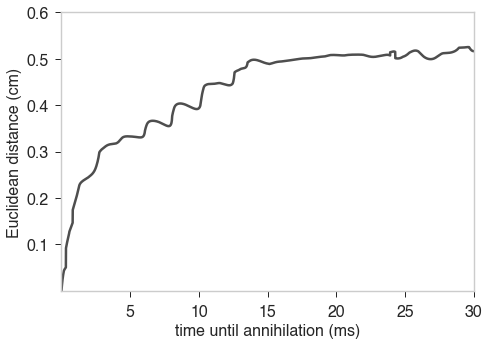

In [342]:
fontsize=16
#plot naive range at death and birth
plt.subplots(figsize=(7,5))#(5,4))

plt.plot(x_values,range_values*5/200,c='k',alpha=0.8,lw=2.5)
# plt.scatter(x_values,range_values*5/200,c='k',alpha=0.5)
# plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
plt.xlabel('time until annihilation (ms)',fontsize=fontsize)
plt.ylabel('Euclidean distance (cm)',fontsize=fontsize)

# plt.legend(fontsize=fontsize)
plt.xlim([1e-3,30])
plt.ylim([1e-4,0.6])
# plt.ylim([1e-3,1e5])
# plt.xscale('log')
# plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=1)
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")


saving=True
savefig_folder=f"{nb_dir}/Figures/fine_death"
savefig_fn=f"fine-death-range.png"
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [ ]:
fontsize=16
#plot naive range at death and birth
plt.subplots(figsize=(7,5))#(5,4))

plt.plot(x_values,range_values*5/200,c='k',alpha=0.8,lw=2.5)
# plt.scatter(x_values,range_values*5/200,c='k',alpha=0.5)
# plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
plt.xlabel('time until annihilation (ms)',fontsize=fontsize)
plt.ylabel('Euclidean distance (cm)',fontsize=fontsize)

# plt.legend(fontsize=fontsize)
plt.xlim([1e-3,30])
plt.ylim([1e-4,1e0])
# plt.ylim([1e-3,1e5])
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize=fontsize)
plt.tick_params(axis='both', which='minor', labelsize=1)
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")

saving=True
savefig_folder=f"{nb_dir}/Figures/fine_death"
savefig_fn=f"fine-death-range-log.png"
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

saved figure in 
	fine-death-range-phase.png


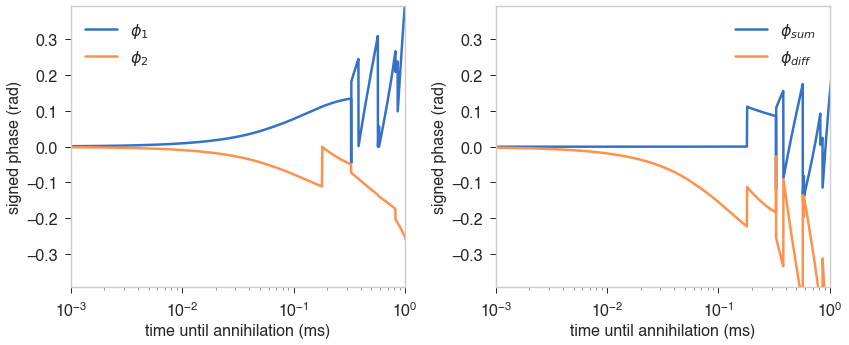

In [343]:
fontsize=16
#plot naive range at death and birth
fig,axs=plt.subplots(ncols=2,figsize=(12,5))#(5,4))

for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
    ax=axs[nax]
    ax.plot(x_values[1:],y_values,alpha=1.0,label=y_label,c=color,lw=2.5)
    # plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
    ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
    ax.set_ylabel('signed phase (rad)',fontsize=fontsize)

    ax.set_xlim([1e-3,1e0])
    ax.set_ylim([-np.pi/8,np.pi/8])
    #     ax.set_xlim([1e-3,1e2])
    ax.set_xscale('log')
    # plt.yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=1)
    ax.legend(fontsize=fontsize)

plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")

saving=True
savefig_folder=f"{nb_dir}/Figures/fine_death"
savefig_fn=f"fine-death-range-phase.png"
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

saved figure in 
	fine-death-phase-log.png


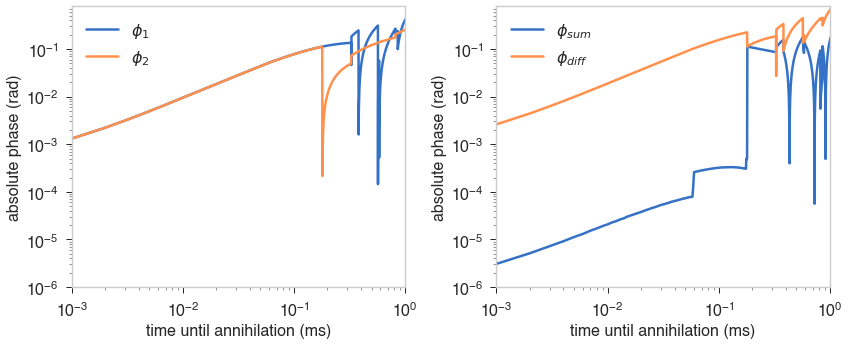

In [344]:
fontsize=16
#plot naive range at death and birth
fig,axs=plt.subplots(ncols=2,figsize=(12,5))#(5,4))

for y_values,y_label,nax,color in zip(y_values_lst,y_label_lst,ax_lst,c_lst):
    ax=axs[nax]
    ax.plot(x_values[1:],np.abs(y_values),alpha=1.0,label=y_label,c=color,lw=2.5)
    # plt.scatter(x_values[boo],range_values[boo],c='k',alpha=0.5,s=3)
    ax.set_xlabel('time until annihilation (ms)',fontsize=fontsize)
    ax.set_ylabel('absolute phase (rad)',fontsize=fontsize)

    ax.set_xlim([1e-3,1e0])
    ax.set_ylim([1e-6,np.pi/4])
    #     ax.set_xlim([1e-3,1e2])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.tick_params(axis='both', which='minor', labelsize=1)
    ax.legend(fontsize=fontsize)

plt.tight_layout()
# plt.show()
# print(f"\ttime between two frames was {0.001} ms")


saving=True
savefig_folder=f"{nb_dir}/Figures/fine_death"
savefig_fn=f"fine-death-phase-log.png"
if not saving: 
    plt.show() 
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

# DONE: save a snapshotand highlight the activation front

(200, 200, 18)


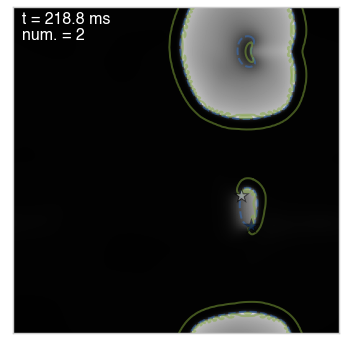

In [359]:
dt=0.001
txt_fn=f'{nb_dir}/Data/test_data/ic008.33_t_218.8.npz'
t=218.8;ds=5.;V_threshold=-50.
txt=load_buffer(txt_fn)
inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
width,height=txt.shape[:2]
print(txt.shape)
one_step,comp_distance,comp_dict_tips=init_methods(width,height,ds,dt,V_threshold=V_threshold,jump_threshold=40)
comp_dict_topo_full_color=comp_dict_tips
#reidentify the tips to be tracked
img=inVc[...,0];dimgdt=dVcdt[...,0]
dict_tips=comp_dict_tips(img, dimgdt, t, txt)
# pdict=ParticlePBCDict(dict_tips=dict_tips, width=width, height=width)#, **kwargs)
t_prev=t;txt_prev=txt.copy()

#visualize token death system
x_values=np.array(dict_tips['x'])[:-2]
y_values=np.array(dict_tips['y'])[:-2]
c_values=np.array(dict_tips['pid'])[:-2]
fig = ShowDomain(img,dimgdt,x_values,y_values,c_values,V_threshold,t,inch=6,
                 fontsize=16,vmin_img=-85.,vmax_img=35.,area=25,
                 frameno=None,#frameno,
                 save_fn=None,#save_fn,
                 save_folder=None,#save_folder,
                 save=False,#True,
                 annotating=True,
                 axis=[0,img.shape[0],0,img.shape[1]])

# TODO: measure slopes on the log-log plot for arclength and range versus time as time goes to zero

In [402]:
t_death_values=t_values[-1]-t_values
arclen_values=sigma_max_lesser_values
x_values=t_death_values


#compute the loglog slope at short times
boo=(x_values<0.05)&(x_values>0.)

y=arclen_values[boo]
x=x_values[boo]

os.chdir(nb_dir)
# !pwd

from lib.measure.powerlaw import *
print_fit_power_law(x,y)

compute_95CI_ols(np.log(x),np.log(y))

m=0.929+-0.008; B=0.005+-0.000
M= 0.01+--0.00 Hz*cm^{2(m-1)}
RMSE=0.0000 Hz/cm^2
R^2=0.999


{'m': 0.9288014760853045,
 'Delta_m': 0.008264220124345896,
 'b': -5.005739853104144,
 'Delta_b': 0.0333491856693554,
 'Rsquared': 0.9990508675836522}

In [401]:
arclen_values=sigma_max_lesser_values
range_values,phi1_values,phi2_values=compute_phases_between(d1,d2,dict_activation_front,field='lesser_xy_values')
# range_values=range_values[1:]
x_values=t_death_values[1:]

#compute the loglog slope at short times
boo=(x_values<0.05)&(x_values>0.)

y=range_values[boo]
x=x_values[boo]

os.chdir(nb_dir)
# !pwd

from lib.measure.powerlaw import *
print_fit_power_law(x,y)

m=0.929+-0.008; B=13.018+-0.044
M= 10.85+-0.27 Hz*cm^{2(m-1)}
RMSE=0.0062 Hz/cm^2
R^2=0.999


In [ ]:
y.shape==x.shape

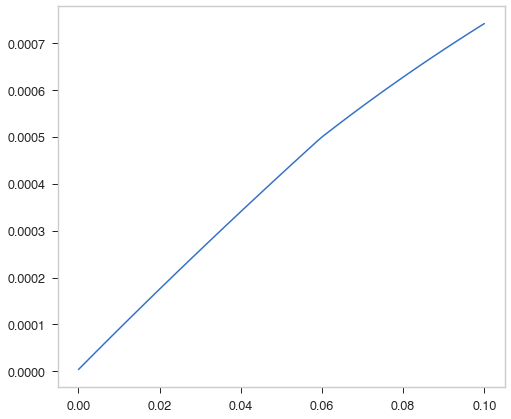

In [384]:
plt.plot(x,y)

# TODO: zoom in for an annihilation event from the FK model
6.1.2021
- TODO: copy my cuda one_step method for the FK model
- TODO: import an ic
- TODO: identify a token FK death event where n=2 --> n=0
then,
- TODO: compute the distance between two tips versus time until death
- TODO: plot the distance between two tips versus time until death

In [3]:
from lib.utils.dist_func import *
from lib.utils.utils_jsonio import *
from lib.model.minimal_model_cuda import *
from lib.measure.utils_measure_tips_cpu import fetch_txt_to_tip_dict
from lib.model.minimal_model import *

In [4]:
from lib.controller.controller_cuda import *

In [5]:
#load initial conditions interactively
#find file interactively
# print("please select a file from within the desired folder.")
# input_file_name = search_for_file()
input_file_name='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ic-in/ic_200x200.001.31.npz'
ic = load_buffer(input_file_name)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


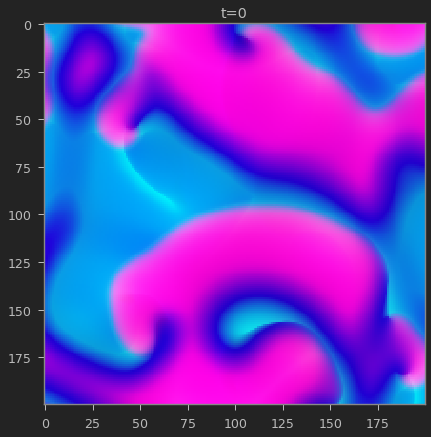

In [6]:
tme=0
plt.imshow(ic)
plt.title(f"t={tme}")
plt.show()

In [7]:
height, width, channel_no = ic.shape

#map initial condition to the three initial scalar fields
u_initial = np.array(ic.astype(np.float64)[...,0])
v_initial = np.array(ic.astype(np.float64)[...,1])
w_initial = np.array(ic.astype(np.float64)[...,2])

In [8]:
diffCoef=0.0005
ds=5
dsdpixel=ds/500
dt=0.001
t=0.;
ds=5.;V_threshold=0.4
#load parameters for parameter set 8 for the Fenton-Karma Model
param_file_name = '/home/timothytyree/Documents/GitHub/care/notebooks/lib/model/param_set_8.json'
kwargs = read_parameters_from_json(param_file_name)
kwargs['diffCoef']=diffCoef
kernel_string = get_kernel_string_FK_model(**kwargs, DT=dt,DX=0.025,height=height,width=width)

In [23]:
# #default observation parameters
# n = 50  #half the number of steps between observations of spiral tips
# nsteps = 10**6
# pad = 10
# edge_tolerance = 6
# atol = 1e-10
# printing=True

width, height, channel_no = ic.shape
zero_txt = np.zeros((width, height, channel_no), dtype=np.float64)
# nanstate = [np.nan,np.nan,np.nan]
# ycoord_mesh, xcoord_mesh = np.meshgrid(np.arange(0,width+2*(pad)),np.arange(0,width+2*pad))

In [10]:
param_fn=param_file_name
param_dir = os.path.join(nb_dir,'lib/model')
param_dict = json.load(open(os.path.join(param_dir,param_fn)))
if diffCoef is not None:
    param_dict['diffCoef']=diffCoef

get_time_step=fetch_get_time_step(width,height,DX=dsdpixel,DY=dsdpixel,**param_dict)

In [11]:
# print(kernel_string)

In [12]:
#initializing cuda context
#initialize PyCuda and get compute capability needed for compilation
context = drv.Device(0).make_context()
devprops = { str(k): v for (k, v) in context.get_device().get_attributes().items() }
cc = str(devprops['COMPUTE_CAPABILITY_MAJOR']) + str(devprops['COMPUTE_CAPABILITY_MINOR'])

#define how resources are used
# width  = kwargs['width']
# height = kwargs['height']
threads = (10,10,1)
grid = (int(width/10), int(height/10), 1)
block_size_string = "#define block_size_x 10\n#define block_size_y 10\n"

#don't allocate memory many times for the same task!
#allocate GPU memory for voltage scalar field
u_old = drv.mem_alloc(u_initial.nbytes)
u_new = drv.mem_alloc(u_initial.nbytes)

#allocate GPU memory for v and w auxiliary fields
v_old = drv.mem_alloc(v_initial.nbytes)
v_new = drv.mem_alloc(v_initial.nbytes)
w_old = drv.mem_alloc(w_initial.nbytes)
w_new = drv.mem_alloc(w_initial.nbytes)

#setup thread block dimensions and compile the kernel
mod = SourceModule(block_size_string+kernel_string)
time_step_kernel = mod.get_function("time_step_kernel")

In [13]:
one_step_map=get_one_step_map(time_step_kernel, drv, u_new, u_old, v_new, v_old, w_new, w_old, threads, grid, context)

In [14]:
get_one_step_map

<function lib.controller.controller_cuda.get_one_step_map(time_step_kernel, drv, u_new, u_old, v_new, v_old, w_new, w_old, threads, grid, context)>

In [19]:
# txt=load_buffer(txt_fn)
# inVc,outVc,inmhjdfx,outmhjdfx,dVcdt=unstack_txt(txt)
# width,height=txt.shape[:2]
print(txt.shape)
one_step,comp_distance,comp_dict_tips=init_methods(width,height,ds,dt,V_threshold=V_threshold,jump_threshold=40)
comp_dict_topo_full_color=comp_dict_tips


(200, 200, 3)


In [33]:
one_step_map

<function lib.controller.controller_cuda.get_one_step_map.<locals>.one_step_map(txt, nsteps)>

In [51]:
#initialize simulation
txt = ic.copy()
tme = 0.
nsteps=1000

In [57]:
#find the termination tmie 
for m in range(100):
    txt=one_step_map(txt,nsteps=nsteps)
    tme+=2*dt*nsteps

#reidentify the tips to be tracked
dtxt_dt = zero_txt.copy()
get_time_step(txt, dtxt_dt)
img=txt[...,0];dimgdt=dtxt_dt[...,0]
# img=inVc[...,0];dimgdt=dVcdt[...,0]
dict_tips=comp_dict_tips(img, dimgdt, t, txt)
# pdict=ParticlePBCDict(dict_tips=dict_tips, width=width, height=width)#, **kwargs)
ntips=len(dict_tips['x'])

while ntips>0:
    t_prev=t;txt_prev=txt.copy()
    for m in range(50):
        txt=one_step_map(txt,nsteps=nsteps)
        tme+=2*dt*nsteps

    #reidentify the tips to be tracked
    dtxt_dt = zero_txt.copy()
    get_time_step(txt, dtxt_dt)
    img=txt[...,0];dimgdt=dtxt_dt[...,0]
    # img=inVc[...,0];dimgdt=dVcdt[...,0]
    dict_tips=comp_dict_tips(img, dimgdt, tme, txt)
    # pdict=ParticlePBCDict(dict_tips=dict_tips, width=width, height=width)#, **kwargs)
    ntips=len(dict_tips['x'])
    print(f"ntips={ntips:.0f}, time={tme:.2f}.",end='\r')

In [26]:
#TODO:combine the LR observation method with the FK one_step method
#DONE: get one_step method working in cuda for fk model
#DONE: get tip detection working
#TODO: integrate up until just before death
#TODO: save texture as with the LR model
#TODO: integrate ^this with the existing routine

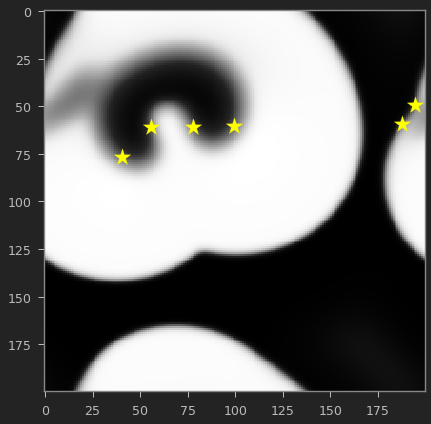

In [76]:
#test the V_threshold value
j=1
V_threshold=0.4
level1 = V_threshold
t=-999
level2 = 0.
one_step,comp_distance,comp_dict_tips=init_methods(width,height,ds,dt,V_threshold=V_threshold,jump_threshold=40)

#reidentify the tips to be tracked
dtxt_dt = zero_txt.copy()
get_time_step(txt_prev, dtxt_dt)
img=txt_prev[...,0];dimgdt=dtxt_dt[...,0]
# compute_all_spiral_tips= get_compute_all_spiral_tips(mode='simp',width=width,height=height)
# dict_out=compute_all_spiral_tips(t,img,dimgdt,level1,level2)#,width=width,height=height)
dict_tips=comp_dict_tips(img, dimgdt, tme, txt_prev)
# print(len(list(dict_out['x'])))
# fig=show_buffer_LR(txt)

ntips=len(dict_tips['x'])
print(f"ntips={ntips:.0f}, time={tme:.2f}.",end='\r')
plt.imshow(img,cmap='gray')
plt.scatter(dict_tips['x'],dict_tips['y'],s=300,c='yellow',marker='*')
plt.show()

In [ ]:
#TODO: once there are 2 tips, save txt_prev